In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import uniform, randint

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
seasons_df=pd.read_pickle('data/seasons_betting_constants_df.pkl')

In [4]:
seasons_df.drop(columns=['Date', 'HomeTeam', 'AwayTeam'], inplace=True)

In [5]:
seasons_df

,FTR,home.matchNumber,away.matchNumber,season,B365H,B365D,B365A,MaxH,AvgH,MaxD,AvgD,MaxA,AvgA,diff.daysSince,diff.total.win,diff.total.draw,diff.total.loss,diff.total.goals,diff.total.conceded,diff.total.half_goals,diff.total.half_conceded,diff.total.shots,diff.total.shots_against,diff.total.shots_target,diff.total.shots_against_target,diff.total.corners,diff.total.corners_conceded,diff.total.fouls,diff.total.fouls_other_team,diff.total.yellows,diff.total.reds,diff.last3.win,diff.last3.draw,diff.last3.loss,diff.last3.goals,diff.last3.conceded,diff.last3.half_goals,diff.last3.half_conceded,diff.last3.shots,diff.last3.shots_against,diff.last3.shots_target,diff.last3.shots_against_target,diff.last3.corners,diff.last3.corners_conceded,diff.last3.fouls,diff.last3.fouls_other_team,diff.last3.yellows,diff.last3.reds,diff.total.win.whenHorA,diff.total.draw.whenHorA,diff.total.loss.whenHorA,diff.grade,diff.grade2,diff.Balance,diff.TotArrivals
0,D,1,1,season09,2.25,3.25,3.20,2.43,2.23,3.40,3.21,3.50,3.13,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,4,16.0,-29980000.0,-3
1,H,1,1,season09,1.67,3.60,5.25,1.73,1.66,3.81,3.48,5.61,5.08,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,23,11.0,585000.0,2
2,D,1,1,season09,1.91,3.30,4.20,1.97,1.88,3.46,3.29,4.48,3.99,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,6,5.0,-25000.0,8
3,H,1,1,season09,2.00,3.30,3.80,2.10,1.97,3.42,3.27,4.00,3.67,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,8,50.0,-2910000.0,-5
4,H,1,1,season09,2.25,3.25,3.20,2.30,2.21,3.31,3.22,3.53,3.10,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,-17,3.0,1385000.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,H,46,46,season23,3.40,3.40,2.20,3.50,3.40,3.45,3.35,2.23,2.16,0.0,-0.333333,0.155556,0.177778,-0.422222,0.488889,-0.222222,0.288889,-2.711111,2.8,-1.511111,1.688889,-0.822222,1.866667,1.777778,-0.933333,0.0,0.066667,-0.333333,0.333333,0.0,-1.333333,-1.666667,-0.333333,-1.0,-4.333333,-4.333333,-3.0,-3.0,-0.666667,3.333333,3.0,-0.666667,2.0,0.0,-0.227273,0.272727,-0.045455,2,-8.0,930000.0,-8
8276,H,46,46,season23,2.05,3.40,3.75,2.10,2.05,3.70,3.52,3.75,3.51,0.0,-0.066667,0.0,0.066667,-0.177778,0.288889,0.0,0.288889,0.688889,-0.577778,-0.2,0.177778,0.622222,-0.155556,2.866667,-0.711111,0.844444,0.044444,0.333333,-0.333333,0.0,0.333333,-0.333333,0.666667,0.0,3.666667,2.666667,0.333333,0.0,-2.0,1.333333,9.0,-5.666667,1.333333,0.0,0.045455,-0.045455,0.0,-2,3.0,31540000.0,7
8277,A,46,46,season23,2.70,3.40,2.55,2.87,2.73,3.40,3.25,2.80,2.62,0.0,0.044444,0.0,-0.044444,0.222222,-0.355556,0.177778,-0.111111,3.244444,-1.644444,1.444444,-0.133333,0.688889,-0.755556,-2.044444,2.822222,-0.177778,-0.066667,-0.333333,-0.333333,0.666667,-2.0,0.0,-0.333333,-0.333333,-2.0,-5.333333,-1.666667,-2.0,1.0,-3.666667,1.333333,0.0,0.0,0.0,0.181818,0.045455,-0.227273,21,-1.0,-3090000.0,-3
8278,A,46,46,season23,2.05,3.50,3.60,2.07,2.04,3.61,3.50,3.76,3.57,0.0,0.0,0.022222,-0.022222,0.333333,0.2,0.111111,0.111111,1.044444,1.177778,0.266667,0.933333,0.911111,-0.711111,-2.466667,2.844444,-0.288889,0.044444,-0.333333,0.333333,0.0,0.666667,0.333333,-0.333333,0.333333,6.0,3.666667,2.0,0.0,2.0,-2.666667,-0.333333,3.666667,0.333333,0.0,0.090909,-0.045455,-0.045455,-

In [6]:
label_encoder = LabelEncoder()
seasons_df['label'] = label_encoder.fit_transform(seasons_df['FTR'])

In [7]:
seasons_df['label'] 

0       1
1       2
2       1
3       2
4       2
       ..
8275    2
8276    2
8277    0
8278    0
8279    2
Name: label, Length: 8280, dtype: int64

In [8]:
pd.set_option('future.no_silent_downcasting', True)
seasons_df=seasons_df.fillna(0)

In [9]:
seasons_df

,FTR,home.matchNumber,away.matchNumber,season,B365H,B365D,B365A,MaxH,AvgH,MaxD,AvgD,MaxA,AvgA,diff.daysSince,diff.total.win,diff.total.draw,diff.total.loss,diff.total.goals,diff.total.conceded,diff.total.half_goals,diff.total.half_conceded,diff.total.shots,diff.total.shots_against,diff.total.shots_target,diff.total.shots_against_target,diff.total.corners,diff.total.corners_conceded,diff.total.fouls,diff.total.fouls_other_team,diff.total.yellows,diff.total.reds,diff.last3.win,diff.last3.draw,diff.last3.loss,diff.last3.goals,diff.last3.conceded,diff.last3.half_goals,diff.last3.half_conceded,diff.last3.shots,diff.last3.shots_against,diff.last3.shots_target,diff.last3.shots_against_target,diff.last3.corners,diff.last3.corners_conceded,diff.last3.fouls,diff.last3.fouls_other_team,diff.last3.yellows,diff.last3.reds,diff.total.win.whenHorA,diff.total.draw.whenHorA,diff.total.loss.whenHorA,diff.grade,diff.grade2,diff.Balance,diff.TotArrivals,label
0,D,1,1,season09,2.25,3.25,3.20,2.43,2.23,3.40,3.21,3.50,3.13,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16.0,-29980000.0,-3,1
1,H,1,1,season09,1.67,3.60,5.25,1.73,1.66,3.81,3.48,5.61,5.08,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,11.0,585000.0,2,2
2,D,1,1,season09,1.91,3.30,4.20,1.97,1.88,3.46,3.29,4.48,3.99,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5.0,-25000.0,8,1
3,H,1,1,season09,2.00,3.30,3.80,2.10,1.97,3.42,3.27,4.00,3.67,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,50.0,-2910000.0,-5,2
4,H,1,1,season09,2.25,3.25,3.20,2.30,2.21,3.31,3.22,3.53,3.10,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-17,3.0,1385000.0,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,H,46,46,season23,3.40,3.40,2.20,3.50,3.40,3.45,3.35,2.23,2.16,0.0,-0.333333,0.155556,0.177778,-0.422222,0.488889,-0.222222,0.288889,-2.711111,2.8,-1.511111,1.688889,-0.822222,1.866667,1.777778,-0.933333,0.0,0.066667,-0.333333,0.333333,0.0,-1.333333,-1.666667,-0.333333,-1.0,-4.333333,-4.333333,-3.0,-3.0,-0.666667,3.333333,3.0,-0.666667,2.0,0.0,-0.227273,0.272727,-0.045455,2,-8.0,930000.0,-8,2
8276,H,46,46,season23,2.05,3.40,3.75,2.10,2.05,3.70,3.52,3.75,3.51,0.0,-0.066667,0.0,0.066667,-0.177778,0.288889,0.0,0.288889,0.688889,-0.577778,-0.2,0.177778,0.622222,-0.155556,2.866667,-0.711111,0.844444,0.044444,0.333333,-0.333333,0.0,0.333333,-0.333333,0.666667,0.0,3.666667,2.666667,0.333333,0.0,-2.0,1.333333,9.0,-5.666667,1.333333,0.0,0.045455,-0.045455,0.0,-2,3.0,31540000.0,7,2
8277,A,46,46,season23,2.70,3.40,2.55,2.87,2.73,3.40,3.25,2.80,2.62,0.0,0.044444,0.0,-0.044444,0.222222,-0.355556,0.177778,-0.111111,3.244444,-1.644444,1.444444,-0.133333,0.688889,-0.755556,-2.044444,2.822222,-0.177778,-0.066667,-0.333333,-0.333333,0.666667,-2.0,0.0,-0.333333,-0.333333,-2.0,-5.333333,-1.666667,-2.0,1.0,-3.666667,1.333333,0.0,0.0,0.0,0.181818,0.045455,-0.227273,21,-1.0,-3090000.0,-3,0
8278,A,46,46,season23,2.05,3.50,3.60,2.07,2.04,3.61,3.50,3.76,3.57,0.0,0.0,0.022222,-0.022222,0.333333,0.2,0.111111,0.111111,1.044444,1.177778,0.266667,0.933333,0.911111,-0.711111,-2.466667,2.844444,-0.288889,0.044444,-0.333333,0.333333,0.0,0.666667,0.333333,-0.333333,0.333333,6.0,3.666667,2.0,0.0,2.0,-2.666667,-0.333333,3.666667,0.333333,0.0,0.090909,-0.045455,-0.045455,-2,-6.0,-18240000.0,-3,0


In [10]:
train=seasons_df[~(seasons_df['season']=='season23')]
train=train.copy()
train.drop('season', axis=1, inplace=True)

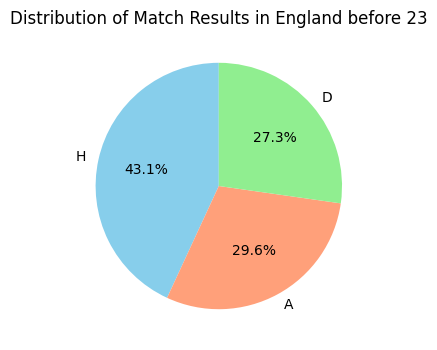

In [11]:
# Calculate value counts for 'result' column
result_counts = train['FTR'].value_counts()

# Define the colors in the same order as the labels
color_mapping = {'A': '#FFA07A',  # Light salmon (matte orange)
                 'H': '#87CEEB',  # Sky blue (matte blue)
                 'D': '#90EE90'}  # Light green (matte green)
colors = [color_mapping[label] for label in result_counts.index]

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(result_counts, labels=result_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Match Results in England before 23")
plt.show()

In [12]:
X_train=train.drop(['label','FTR'], axis=1)
y_train=train['label']

In [13]:
test=seasons_df[seasons_df['season']=='season23']
test=test.copy()
test.drop('season', axis=1, inplace=True)

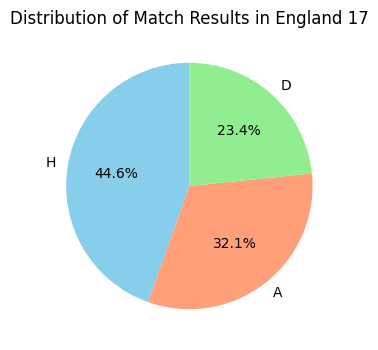

In [14]:
# Calculate value counts for 'result' column
result_counts = test['FTR'].value_counts()

# Define the colors in the same order as the labels
color_mapping = {'A': '#FFA07A',  # Light salmon (matte orange)
                 'H': '#87CEEB',  # Sky blue (matte blue)
                 'D': '#90EE90'}  # Light green (matte green)
colors = [color_mapping[label] for label in result_counts.index]

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(result_counts, labels=result_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Match Results in England 17")
plt.show()

In [15]:
X_test=test.drop(['label', 'FTR'], axis=1)
y_test=test['label']

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_test

array([[-1.69492605, -1.69467014,  0.89146257, ..., -2.0001892 ,
        10.00615508, -2.77775878],
       [-1.69492605, -1.69467014,  0.44280776, ...,  0.12122359,
         0.22061586,  0.34721985],
       [-1.69492605, -1.69467014, -0.45450185, ..., -0.24244718,
        -1.31327721,  0.        ],
       ...,
       [ 1.69514051,  1.69445573,  0.37871422, ..., -0.06061179,
        -0.18936195, -0.52082977],
       [ 1.69514051,  1.69445573, -0.45450185, ..., -0.36367076,
        -1.11778705, -0.52082977],
       [ 1.69514051,  1.69445573, -1.22362437, ...,  0.18183538,
        -0.71332463,  1.73609924]])

### RandomForest

In [18]:
# Step 4: Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.48


In [20]:
def evaluate_model(model, X_test, y_test, label_encoder):
    """
    Evaluate the model's performance using accuracy and a classification report.
    
    Parameters:
    model: The trained model
    X_test: Test features
    y_test: Actual labels for the test set
    label_encoder: The label encoder used to transform labels
    
    Returns:
    y_test_labels, y_pred_labels - The actual and predicted labels in original format
    """
    from sklearn.metrics import accuracy_score, classification_report
    
    # Step 1: Make predictions
    y_pred = model.predict(X_test)
    
    # Step 2: Convert predicted numeric labels back to original labels
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    
    # Step 3: Convert actual labels back to original labels
    y_test_labels = label_encoder.inverse_transform(y_test)
    
    # Step 4: Calculate and print accuracy
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    print(f"Model accuracy: {accuracy:.2f}")
    
    # Step 5: Generate and print classification report
    class_report = classification_report(y_test_labels, y_pred_labels)
    print("\nClassification Report:")
    print(class_report)

    return y_test_labels, y_pred_labels


In [21]:
y_test_labels, y_pred_labels = evaluate_model(model, X_test, y_test, label_encoder)

Model accuracy: 0.48

Classification Report:
              precision    recall  f1-score   support

           A       0.41      0.43      0.42       177
           D       0.36      0.12      0.18       129
           H       0.53      0.70      0.60       246

    accuracy                           0.48       552
   macro avg       0.43      0.42      0.40       552
weighted avg       0.45      0.48      0.45       552



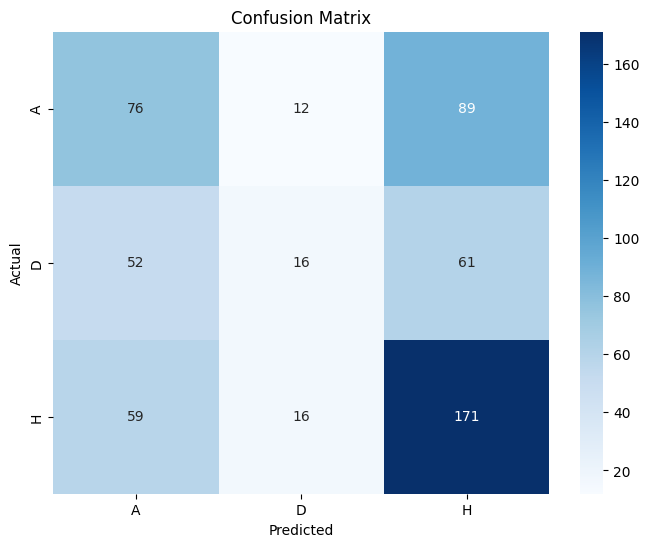

In [22]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Get feature importance from the model
feature_importances = model.feature_importances_

# Create a DataFrame to make it easier to read
feature_importance_df = pd.DataFrame({
    'Feature': train.drop(['label','FTR'], axis=1).columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)
## Plot the feature importance
#plt.figure(figsize=(10, 6))
#plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
#plt.xlabel('Importance')
#plt.title('Feature Importance')
#plt.show()

                            Feature  Importance
51                     diff.Balance    0.026792
10                             AvgA    0.025758
23               diff.total.corners    0.024483
24      diff.total.corners_conceded    0.023704
26      diff.total.fouls_other_team    0.023657
25                 diff.total.fouls    0.023485
19                 diff.total.shots    0.023386
6                              AvgH    0.023294
21          diff.total.shots_target    0.023156
50                      diff.grade2    0.022785
9                              MaxA    0.022660
5                              MaxH    0.022559
22  diff.total.shots_against_target    0.022272
20         diff.total.shots_against    0.022080
15                 diff.total.goals    0.022065
49                       diff.grade    0.021957
27               diff.total.yellows    0.021831
18         diff.total.half_conceded    0.021739
16              diff.total.conceded    0.021436
17            diff.total.half_goals    0

In [ ]:
#%%time
##Wall time: 6min 16s

#param_grid = {
#    'n_estimators': [100, 200, 300, 400, 500],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'criterion': ['gini', 'entropy']
#}
#random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_iter=20, verbose=1)
#random_search.fit(X_train, y_train)
#print(f'Best Parameters: {random_search.best_params_}')

🔍 Running Random Search with 20 iterations...

